# Лабораторна робота №2 з Видобування даних
## Розуміння даних
### Мета роботи: навчитися базовому фунукціоналу pandas/matplotlib для числельного і візуального аналізу вхідних даних та їх характеристик

###1.[Завантажте набір даних у колаб](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92), і у data frame за допомогою pandas відобразіть перші 10 записів 

In [1]:
### Code starts from here ###
import pandas as pd

url = 'https://raw.githubusercontent.com/AndrewVoisovych/DataMiningLabs/master/understat.com.csv'
data = pd.read_csv(url)

data.head(10)

,сhampionship,season,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
80,La_liga,2018,1,Barcelona,38,26,9,3,90,36,...,44.930950,8.930950,43.444400,33.140304,9.015264,16.404885,417,171,73.9604,-13.0396
81,La_liga,2018,2,Atletico Madrid,38,22,10,6,55,29,...,41.434059,12.434059,37.717794,11.013142,11.066205,11.104778,252,190,59.4276,-16.5724
82,La_liga,2018,3,Real Madrid,38,21,5,12,63,46,...,48.675753,2.675753,42.729664,19.235861,8.896578,14.782501,341,168,64.7728,-3.2272
83,La_liga,2018,4,Valencia,38,15,16,7,51,35,...,42.854367,7.854367,36.908410,19.660609,12.964658,9.474007,278,215,65.1616,4.1616
84,La_liga,2018,5,Sevilla,38,17,8,13,62,47,...,46.710732,-0.289268,41.508815,23.033638,10.652031,10.020620,321,211,65.0781,6.0781
85,La_liga,2018,6,Getafe,38,15,14,9,48,35,...,44.226041,9.226041,39.023110,3.555041,8.766903,5.700771,186,196,53.1872,-5.8128
86,La_liga,2018,7,Espanyol,38,14,11,13,48,50,...,54.616086,4.616086,48.548747,-1.364519,9.856489,9.819171,241,241,50.0883,-2.9117
87,La_liga,2018,8,Athletic Club,38,13,14,11,41,45,...,47.158818,2.158818,43.442428,-4.525349,8.304492,11.302558,221,185,50.0122,-2.9878
88,La_liga,2018,9,Real Sociedad,38,13,11,14,45,46,...,48.094440,2.094440,45.683970,-5.129504,9.943556,9.488771,194,208,51.1255,1.1255
89,La_liga,2018,10,Alaves,38,13,11,14,39,50,...,54.532088,4.532088,50.072421,-11.429247,11.228230,7.096710,129,270,44.0162,-5.9838


###2.Опишіть колонки які ви використовуєте для аналізу в подальшому, що за дані в них зберігаються якщо потрібен опис або їх призначення неочевидне / специфічне для домену 

Для аналізу використовуватимуться такі колонки:
1. сhampionship - ліга країни.
2. season - сезон (вересень - травень), рік означає початоквий рік сезону.
3. position - позиція по закінченню сезону.
4. team - назва команди.
5. matches - кількість зіграних матчів.
6. wins - кількість перемог.
7. draws - кількість нічий.
8. loses - кільість поразок
9. scored - кількість забитих м’ячів.
10. missed - кільість пропущених м’ячів.
11. pts - кількість набраних очок (3 - виграш, 1 - нічия, 0 - поразка).
12. xG - кількість очікуваних голів (статистична величина, вирахована за допомогою доданих коефіцієнтів вартості небезпечних моментів біля чужих воріт, які оцінені певним експертом за допомогою змінної кількості параметрів).
13. xG_diff - різниця між кількістю голів та кількістю очікуваних голів.
14. xGA - кількість очікуваних голів противника.
15. npxG - очікувані голи без пенальті та автоголів.
16. npxGA - очікувані голи противника без пенальті та автоголів.
17. npxGD - різниця npxG та npxGA. (фактор який впливає на "везучість", чим більше тим краще)
18. ppda_coef - сила пресингу, чим нижче значення, тим вище рівень інтенсивності пресингу (не менше 40 метрів від воріт).
19. oppda_coef - сила пресингу супротивника, чим вище тим краще, значення скільки противник дозволяє робити передач після втрати. 
20. deep - скільки раз успішно доставили м’яч у зону 18 метрів від воріт(без  навісів), показує рівень атаки, та рівень захисту провтиника.
21. deep_allowed - скільки раз супротивник успішно  доставив м’яч у  зону 18 метрів від воріт (без навісів).
22. xpts - очікувана кількість набраних очків (базується на показнику xG).
23. xpts_diff - різниця набраних очків та очікуваної кількості набраних очків.

###3.Чи є [категоріальні / числові дані](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee) ? [Виведіть усі варіанти категорій для певної колонки](https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/) ( в рамках розуміного - якщо ці категорії це унікальні значення тоді не треба). Чи є закодовані дані (з використанням скорочень / кодів / ітд) - що вони значать у вашому випадку? 
 
Є і категоріальні дані і числові.
Категоріальні дані:
1. Назва ліги країни 
2. Сезон
3. Позиція після сезону

Категоріальні унікальні дані: 
1. Назви команд




In [2]:
print ('Championship:', data['сhampionship'].unique())
print ('Season:', data['season'].unique())
print ('Position:', data['position'].unique())
print ('')
print ('Team:', data['team'].unique())


Championship: ['La_liga' 'EPL' 'Bundesliga' 'Serie_A' 'Ligue_1' 'RFPL']
Season: [2014 2015 2016 2017 2018]
Position: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Team: ['Barcelona' 'Real Madrid' 'Atletico Madrid' 'Valencia' 'Sevilla'
 'Villarreal' 'Athletic Club' 'Celta Vigo' 'Malaga' 'Rayo Vallecano'
 'Espanyol' 'Real Sociedad' 'Elche' 'Getafe' 'Levante'
 'Deportivo La Coruna' 'Granada' 'Eibar' 'Almeria' 'Cordoba' 'Real Betis'
 'Las Palmas' 'Sporting Gijon' 'Alaves' 'Leganes' 'Osasuna' 'Girona'
 'Real Valladolid' 'SD Huesca' 'Chelsea' 'Manchester City' 'Arsenal'
 'Manchester United' 'Tottenham' 'Liverpool' 'Southampton' 'Swansea'
 'Stoke' 'Crystal Palace' 'West Ham' 'Everton' 'West Bromwich Albion'
 'Leicester' 'Newcastle United' 'Aston Villa' 'Sunderland' 'Hull'
 'Burnley' 'Queens Park Rangers' 'Watford' 'Bournemouth' 'Norwich'
 'Middlesbrough' 'Brighton' 'Huddersfield' 'Wolverhampton Wanderers'
 'Cardiff' 'Fulham' 'Bayern Munich' 'Wolfsburg' 'Borussia M.Gladbach'
 

###4.Виведіть максимальні / мінімальні значення для числових колонок. Чи вони коректні в реаліях домену? Чи вони взагалі є подібним до реальності числом чи швидше заглушкою/помилкою?


In [3]:
print('Maximum:')
print(data.max(numeric_only=True))
print('')
print('Minimum:')
print(data.min(numeric_only=True))

Maximum:
season          2018.000000
position          20.000000
matches           38.000000
wins              32.000000
draws             18.000000
loses             29.000000
scored           118.000000
missed            94.000000
pts              100.000000
xG               113.598270
xG_diff           18.148854
npxG              99.477020
xGA               78.863255
xGA_diff          15.540152
npxGA             72.013818
npxGD             73.049305
ppda_coef         20.304275
oppda_coef        30.468113
deep             582.000000
deep_allowed     364.000000
xpts              94.380000
xpts_diff         23.047500
dtype: float64

Minimum:
season          2014.000000
position           1.000000
matches           30.000000
wins               2.000000
draws              2.000000
loses              1.000000
scored            13.000000
missed            15.000000
pts               13.000000
xG                15.064491
xG_diff          -30.963020
npxG              13.166872
xGA           

Максимальні значення є коректними в реаліях датасету чи певної вибірки максимальних даних, та не є заглушками чи помилками. Мінімальні дані є не коректними та не є статично обґрунтованими.

###5.чи є у вас у даних пусті / null / нулі / або інакшим чином некоректні / незаповнені записи або клітинки? Наскільки ці колонки для вас критичні якщо такі є?  [(help)](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
)

(**sic!** в рамках даної лабораторної тільки виявлення таких записів без їхньої зміни - тільки якщо вона потрібна вашим подальшим завданням у даній лабораторні)


In [4]:
data.isnull()

,сhampionship,season,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Ні, пустих записів у мене не присутньо. Датасет сформовано вже так, що є тільки все необхідне і вибір вже можу робити я , звужуючи параметри.

###6.Виведіть за допомогою matplotlib/seaborn 3 або більше (якщо хочете) [розподілів для даних](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0); що з них можна дізнатися цікавого/корисного для нас? [Який тип ймовріносного розподілу для них найближчий? ](http://tinyheero.github.io/assets/prob-distr/overview-prob-distr.png)




In [5]:
import seaborn as sns
sns.distplot(data["pts"])
sns.distplot(data["xpts"])

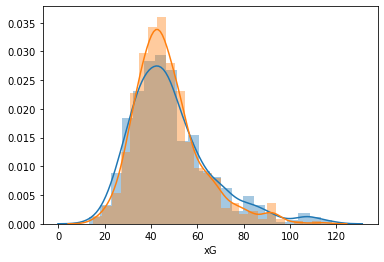

In [6]:
sns.distplot(data["scored"])
sns.distplot(data["xG"])

Із наведених графіків можна побачити, що нашим даним найбільше підходить біноміальний розподіл. Тому що дані є симетричні та їх можна передбачити.

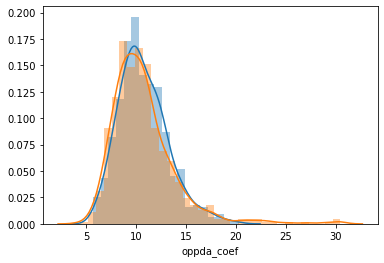

In [7]:
sns.distplot(data["ppda_coef"])
sns.distplot(data["oppda_coef"])


###7.Виведіть 3 (або більше якщо вважаєте за потрібне) графіки за допомогою [matplotlib](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596)/seaborn/ggplot/altair для ваших колонок. Що з них корисного / цікавого можна дізнатися? (не обов'язково довго мудрувати можете описати що бачите на них якщо немає якихось нових здогакдок/інсайтів)


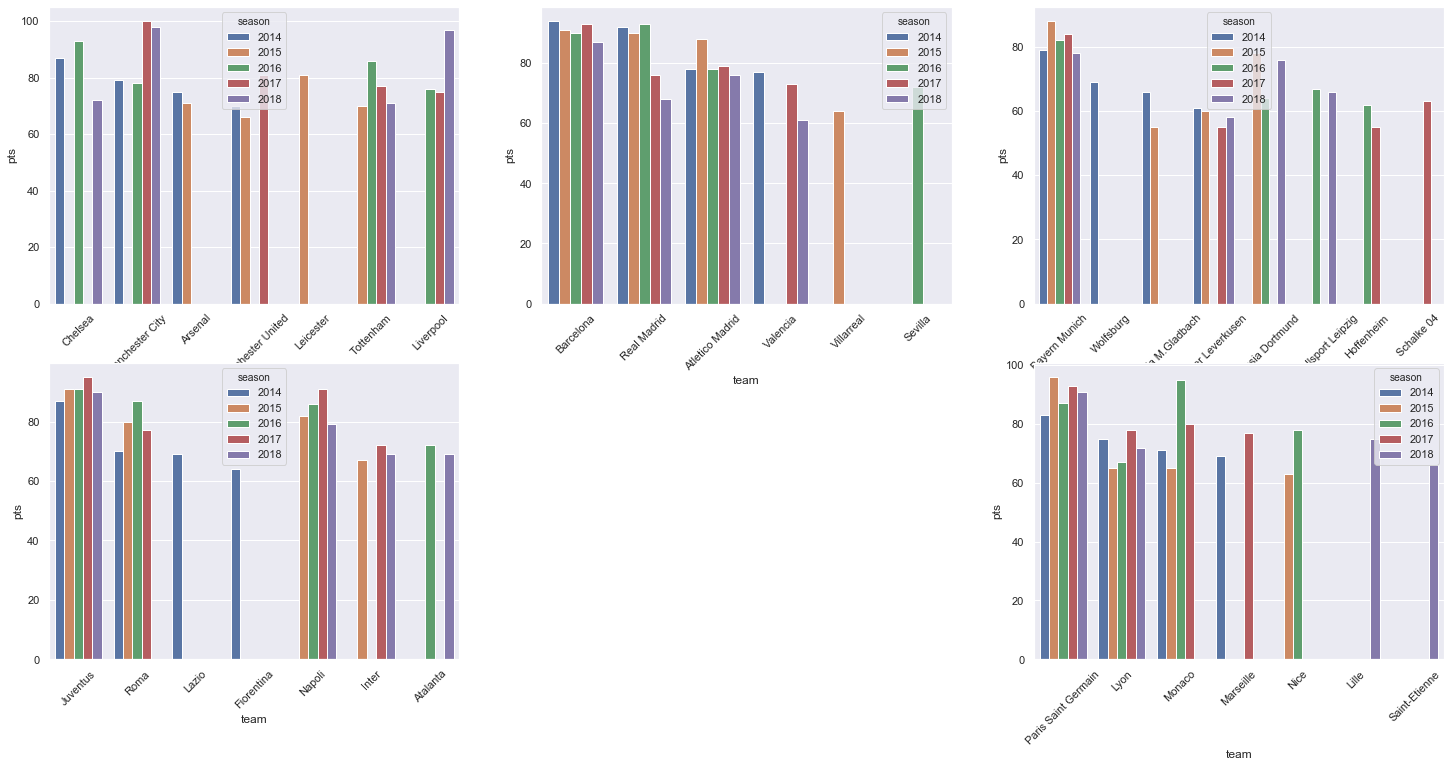

In [12]:
import matplotlib.pyplot as plt

import numpy as np

sns.set()

df = data
f = plt.figure(figsize=(25,12))
ax = f.add_subplot(2,3,1)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='season', data=df[(df['сhampionship'] == 'EPL') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(2,3,2)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='season', data=df[(df['сhampionship'] == 'La_liga') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(2,3,3)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='season', data=df[(df['сhampionship'] == 'Bundesliga') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(2,3,4)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='season', data=df[(df['сhampionship'] == 'Serie_A') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(2,3,6)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='season', data=df[(df['сhampionship'] == 'Ligue_1') & (df['position'] <= 4)], ax=ax)

На гістограмах  видно що є команди, які за останні 5 років, були в топ-4 в свому чемпіонаті, тільки раз. Це означає, що це не є нормою для них й  можливо якщо копнути глибше, можна буде найти фактор удачі.

###8.[Виведіть кореляційну матрицю або heatmap для ваших даних](https://datatofish.com/correlation-matrix-pandas/) (можете обрати частину з них). Чи є цікаві /до того не замітні кореляції між даними? Чи вони були очевидні до того або їх можна пояснити гіпотезою з вашого боку? Наведіть 3 приклади.

In [2]:
corr_matrix = data.corr()
print(corr_matrix)


                    season      position       matches      wins     draws  \
season        1.000000e+00 -1.264623e-17 -6.071463e-18  0.002510 -0.010181   
position     -1.264623e-17  1.000000e+00  1.301810e-01 -0.870112  0.187476   
matches      -6.071463e-18  1.301810e-01  1.000000e+00  0.202108  0.173228   
wins          2.510368e-03 -8.701120e-01  2.021080e-01  1.000000 -0.334472   
draws        -1.018053e-02  1.874761e-01  1.732278e-01 -0.334472  1.000000   
loses         2.689107e-03  9.013048e-01  2.164982e-01 -0.788496 -0.079138   
scored        2.717773e-02 -7.069905e-01  2.949861e-01  0.882977 -0.224380   
missed        3.461879e-02  7.672884e-01  3.757511e-01 -0.615375  0.031134   
pts           8.738123e-04 -8.764265e-01  2.407870e-01  0.986827 -0.177607   
xG            7.903514e-02 -6.338118e-01  3.655672e-01  0.818197 -0.171363   
xG_diff       9.599821e-02  4.771775e-01  1.237880e-02 -0.540294  0.213754   
npxG          7.004033e-02 -6.321608e-01  3.603043e-01  0.816677